# Homework 2

In this homework we'll explore decision trees and overfitting, and learn about the right way to evaluate the performance of a classifier.

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [2]:
def make_dataset(n, d = 4, p = 0):
    """
    Create a dataset with boolean features and a binary class label.
    The label is assigned as x1 ^ x2 V x3 ^ x4.
    
    Arguments:
      n - The number of instances to generate
      m - The number of features per instance.  Any features beyond the first four
          are irrelevant to determining the class label.
      p - The probability that the true class label as computed by the expression
          above is flipped.  Said differently, this is the probability of class noise.
    """
    
    assert d >= 4, 'The dataset must have at least 4 features'
    X = [np.random.randint(2, size = d) for _ in range(n)]
    y = [(x[0] and x[1]) or (x[2] and x[3]) for x in X]
    y = [v if random.random() >= p else (v + 1) % 2 for v in y]
    return X, y

When evaluating the accuracy of a classifier, the right way to do it is to have a test set of instances that were not used to train the classifier and measure on those instances.  The [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in scikit makes it easy to create training and testing sets.  Below is an example that shows overfitting as evidenced by higher accuracy on the training set than the testing set.

In [3]:
# Create a dataset with 1000 instances, each with 10 attributes, and 10% class noise
X, y = make_dataset(1000, d = 10, p = 0.1)

In [4]:
# Make training and testing sets, each with half of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

In [5]:
# Train the classifier and evaluate it on train/test splits
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Training accuracy: %.2f' % accuracy_score(y_train, clf.predict(X_train)))
print('Testing accuracy:  %.2f' % accuracy_score(y_test, clf.predict(X_test)))

Training accuracy: 0.96
Testing accuracy:  0.82


Note that if the training set has 0% class noise, we get a perfect tree.  Spend some time convincing yourself that the tree below captures the boolean expression that assigns class labels.

In [6]:
X, y = make_dataset(1000, d = 10, p = 0.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(export_text(clf))

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1



# Assignment

Explore the impact of the following on the extent of overfitting:
* The size of the dataset (n in the call to make_dataset)
* The number of irrelevant features (d in the call to make_dataset)
* The probability of class noise (p in the call to make_dataset)
* The minimum number of samples required for a node to be split.  That is the min_samples_split parameter to the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) constructor

<p>
    
Vary each of the parameters above and build learning curves for training and testing accuracy, plot them, and for each of the parameters write up an explanation for the impact the parameter has on overfitting.  Also, in each case, display at least one decision tree and explain what is happening that is making it overfit.

Here is an example of generating a learning curve for a fixed size dataset where the fraction of instances used for training is varied.  You can use this template to create your own learning curves.

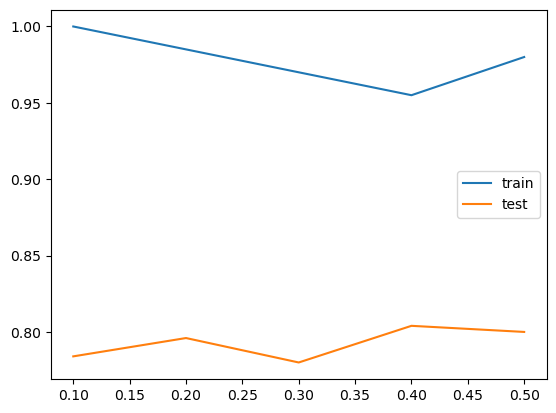

In [7]:
X, y = make_dataset(1000, d = 10, p = 0.1)

test_acc = []
train_acc = []
frac = [0.1, 0.2, 0.3, 0.4, 0.5]
for f in frac:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=f)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    
plt.plot(frac, train_acc, label = 'train')
plt.plot(frac, test_acc, label = 'test')
plt.legend()

In [8]:
print(export_text(clf))

|--- feature_1 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- 

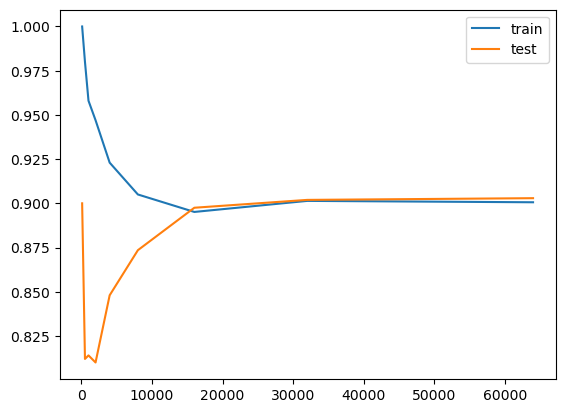

In [9]:
test_acc = []
train_acc = []
frac = [100,500,1000,2000,4000,8000,16000,32000,64000]
for i in frac:
    X, y = make_dataset(i, d = 10, p = 0.1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    
plt.plot(frac, train_acc, label = 'train')
plt.plot(frac, test_acc, label = 'test')
plt.legend()

The dataset used above doubles every index, so it increases the size. As the size increments, the space 
between test set and training set decreases. They also both eventually intersect. I think this is not really overfitting.
Feeding lots of data into the model allows the model to create more similarities.

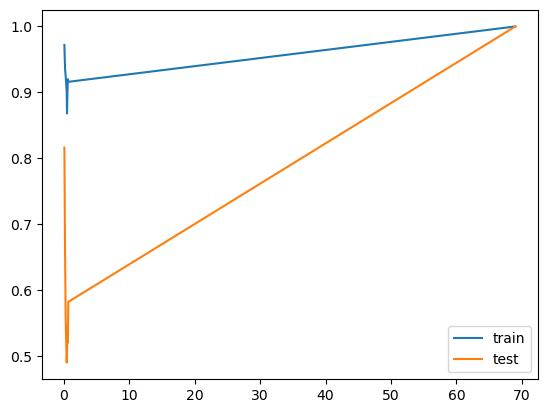

In [10]:
test_acc = []
train_acc = []
frac = [0.1,0.2,0.3,0.45,0.5,0.57,0.63,0.7,69]
for i in frac:
    X, y = make_dataset(1000, d = 10, p = i)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))        
        
plt.plot(frac, train_acc, label = 'train')
plt.plot(frac, test_acc, label = 'test')
plt.legend()

The values in the plot above are increasing. As a result, the space gets bigger for a small amount of time. Then it ends up getting smaller and smaller. Like at 60, the accuracy becomes 100%. The way the data values are set up and how the plot came out, it looks like there are unwanted signals in the model.

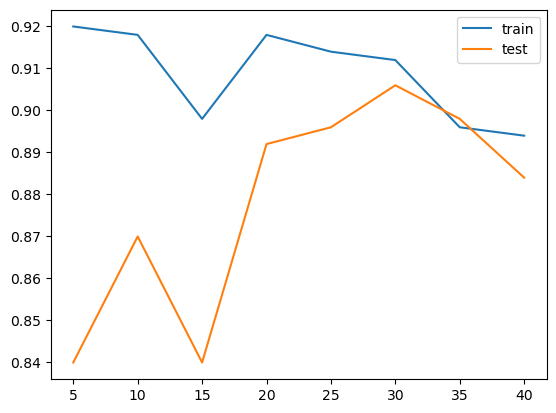

In [11]:
test_acc = []
train_acc = []
frac = [5,10,15,20,25,30,35,40]
for i in frac:
    X, y = make_dataset(1000, d = 10, p = 0.1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
    clf = tree.DecisionTreeClassifier(min_samples_split=i)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))        
        
plt.plot(frac, train_acc, label = 'train')
plt.plot(frac, test_acc, label = 'test')
plt.legend()

In this final plot, I made the data values multiples of 5 and they do increment. The training and test sets have irregularity where they both intersect or go away from eachother.

In [12]:
frac = [1,6,22,55]
for i in frac:
    X, y = make_dataset(1000, d = 10, p = i)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test))) 
    print(export_text(clf))


|--- feature_3 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 0

|--- feature_2 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |-

By setting a higher minimum number of samples required for a split, the decision tree model can avoid creating complex trees with many splits. This can lead to simpler models with lower variance and less overfitting.

When we increase the size of the dataset, we generally observe a decrease in overfitting. A larger dataset helps the model generalize better by capturing more information about the problem at hand. By using more samples for training, we reduce the chances of the model memorizing the training data and becoming overly complex. Therefore, increasing the dataset size can help in reducing overfitting.

When the dataset is small, the decision tree can quickly become overly complex as it tries to fit every training example precisely. This can lead to high variance and overfitting. In contrast, with larger datasets, the decision tree model may not be able to capture all the nuances in the data, leading to high bias but low variance.

When we increase the number of irrelevant features in the dataset, we usually observe an increase in overfitting. This is because irrelevant features introduce noise into the dataset, making it harder for the model to discern the important patterns. As a result, the model may start to fit the noise, which can lead to overfitting.

When we increase the probability of class noise, we generally observe an increase in overfitting. Class noise refers to errors or inconsistencies in the target variable that can mislead the model during training. As the probability of noise increases, the model may start to memorize the training data, leading to overfitting.